In [ ]:
!pip install neuralprophet

In [2]:
import pandas as pd
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt
import pickle

In [ ]:
df = pd.read_csv('weather.csv')
df.head()


In [8]:
df.columns

Index(['Precipitation', 'Date', 'Month', 'Week of', 'Year', 'City', 'Code',
       'Location', 'State', 'Temperature.Avg Temp', 'Temperature.Max Temp',
       'Temperature.Min Temp', 'Wind.Direction', 'Wind.Speed'],
      dtype='object')

In [ ]:
melb = df[df['City']=='Birmingham']
melb['Date'] = pd.to_datetime(melb['Date'])
melb.head()

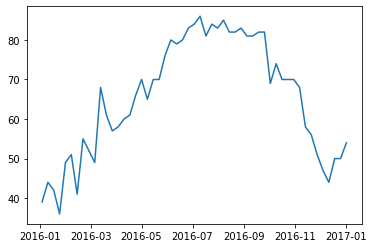

In [10]:
plt.plot(melb['Date'], melb['Temperature.Avg Temp'])
plt.show()

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.



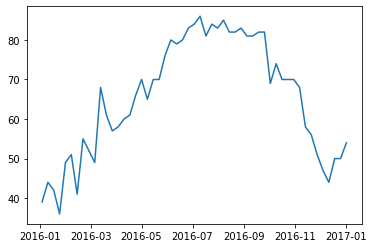

In [11]:
melb['Year'] = melb['Date'].apply(lambda x: x.year)
melb = melb[melb['Year']<=2017]
plt.plot(melb['Date'], melb['Temperature.Avg Temp'])
plt.show()

In [ ]:
data = melb[['Date', 'Temperature.Avg Temp']] 
data.dropna(inplace=True)
data.columns = ['ds', 'y'] 
data.head()

In [ ]:
m = NeuralProphet()
model = m.fit(data, freq='D', epochs=1000)


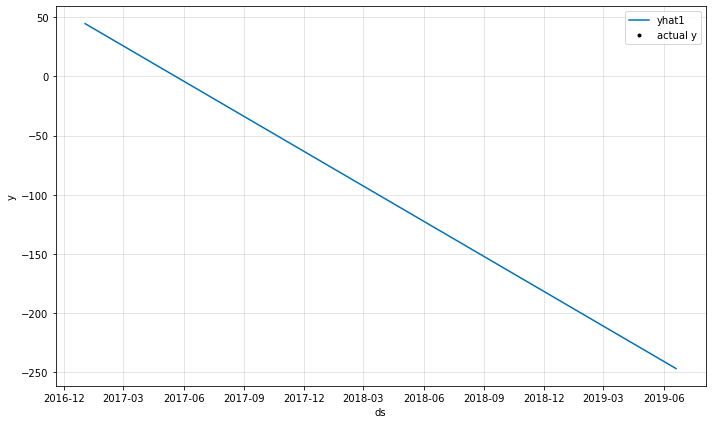

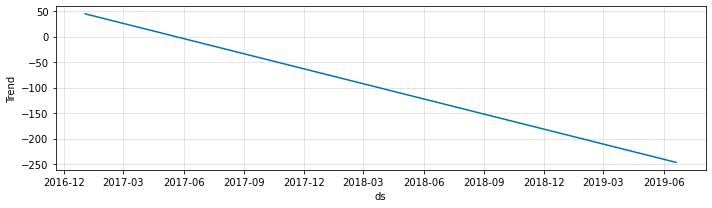

In [14]:
future = m.make_future_dataframe(data, periods=900)
forecast = m.predict(future)
forecast.head()
plot1 = m.plot(forecast)
plt2 = m.plot_components(forecast)
with open('saved_model.pkl', "wb") as f:
    pickle.dump(m, f)

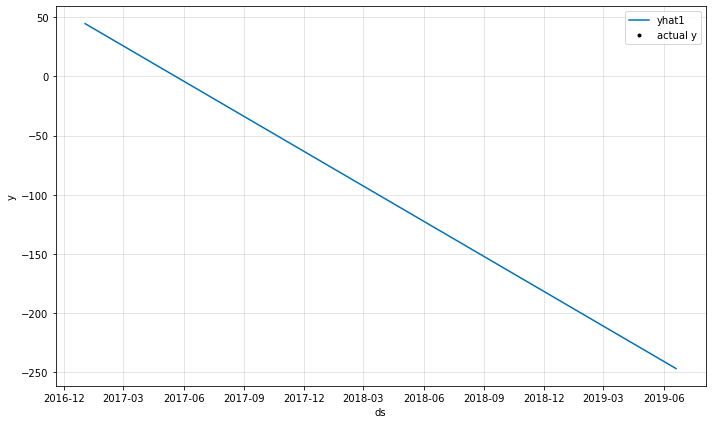

In [15]:
del m
with open('saved_model.pkl', "rb") as f:
    m = pickle.load(f)
future = m.make_future_dataframe(data, periods=900)
forecast = m.predict(future)
forecast.head()
plot1 = m.plot(forecast)